In [1]:
import numpy as np
import pickle 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

In [2]:
! ls data

1big_layer_256_seq_DELEAKDATA.keras raw_data.csv
deleak_series                       soroe_13_19.pkl
drought_index.csv                   soroe_2019.pkl
electricity2019.pkl                 top15.pkl
features.pkl                        wd.pkl
flow_05.pkl                         wd_label.pkl
flow_deleaked.pkl                   weather.pkl
flow_soroe.pkl                      weather13_19.pkl
model.h5                            weather_features
model.h5_old                        x_scaler.pkl
model_alpha05.h5                    y_scaler.pkl
preds.pkl


In [3]:
"""deleak = pd.read_pickle('./data/flow_deleaked.pkl')
features = pd.read_pickle('./data/top15.pkl')
top15 = pd.read_pickle('./data/top15.pkl')
flow = pd.read_pickle('./data/soroe_13_19.pkl')"""

In [4]:
"""features = features.drop(['flow'], axis=1)
#features = pd.concat([deleak, features], join='inner', axis=1)
features['wd_tomorrow'] = features.wd_label.shift(-1)
features = features.drop(['wd_label'], axis=1)
#features = features.drop(['flow'], axis=1)[0:-24]"""

In [5]:
"""features.rename(columns={'wd_shift' : 'shift_wd1'}, inplace=True)"""

In [6]:
"""filehandler = open('./data/x_scaler.pkl', 'rb') 
x_scaler = pickle.load(filehandler)"""

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
"""filehandler = open('./data/y_scaler.pkl', 'rb') 
y_scaler = pickle.load(filehandler)"""

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
"""def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the mean squared error between y_true and y_pred but ignores the warmup-period of the sequence,
    as there is not yet enough data to make serious predictions.
    """
    
    # The shape of both input tensors are 
    # (batch_size, sequence_length, num_y_signals)
    
    # Ignore the warm-up period by taking slices of the tensors
    y_true_slice = y_true[: , warmup_steps: , :]
    y_pred_slice = y_pred[: , warmup_steps: , :]
    
    # The sliced tensors have the shape (batch_size, sequence_length - warmup_length, num_y_signals)
    
    # Calculate the MSE loss for each value pair
    loss = tf.losses.mean_squared_error(y_true_slice, y_pred_slice)
    loss_mean = tf.reduce_mean(loss)
    
    return loss_mean

warmup_steps = 30"""

In [9]:
model = tf.keras.models.load_model(
    './data/model_alpha05.h5',
    custom_objects= {'loss_mse_warmup' : loss_mse_warmup,
                     'warmup_steps' : warmup_steps}
)

W0822 21:31:51.301537 140736036610944 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
"""test = model.predict(np.expand_dims(top15.iloc[0:1000 , :].drop(['flow'], axis=1), axis=0))"""

In [11]:
"""features.dropna(axis=0, how='any', inplace=True)"""

In [12]:
"""x_scaled = x_scaler.transform(features)
x_sc = np.expand_dims(x_scaled, axis=0)"""

In [13]:
"""test = model.predict(x_sc[:, 0:100, :])"""

In [14]:
"""test2 = np.hstack([test[0][98], test[0][99]])"""

In [15]:
"""x_sc.shape"""

(1, 49772, 12)

In [16]:
"""x_sc[: , 0:1344-44, :].shape"""

(1, 1300, 12)

In [17]:
"""preds = []
for i in range(x_sc.shape[1]):
    if i < 1344:
        new_pred = model.predict(x_sc[:, 0:i+1 , :])[0][i][0]
        preds.append(new_pred)
    else:
        new_pred = model.predict(x_sc[:, i-1344:i+1 , :])[0][1344][0]
        preds.append(new_pred)
    if i % 100 == 0:
        print(i)
"""

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [18]:
"""preds = np.array(preds)"""

In [19]:
"""import pickle 
filehandler = open('./data/preds3.pkl', 'wb') 
pickle.dump(preds, filehandler)"""

In [20]:
model.predict(x_sc[: , 80:300, :])[0]

array([[0.5032133 , 0.4994931 , 0.47873682, ..., 0.48819205, 0.5009054 ,
        0.49568415],
       [0.52111995, 0.5071193 , 0.48011595, ..., 0.506831  , 0.51790434,
        0.5130375 ],
       [0.52992254, 0.5087062 , 0.47885212, ..., 0.5252019 , 0.5304783 ,
        0.5230066 ],
       ...,
       [0.6460291 , 0.614902  , 0.58943176, ..., 0.5987729 , 0.6504654 ,
        0.6478689 ],
       [0.61706287, 0.58696806, 0.56205434, ..., 0.64513934, 0.6528161 ,
        0.6229063 ],
       [0.5898726 , 0.56728506, 0.5481706 , ..., 0.6434589 , 0.6353806 ,
        0.59803617]], dtype=float32)

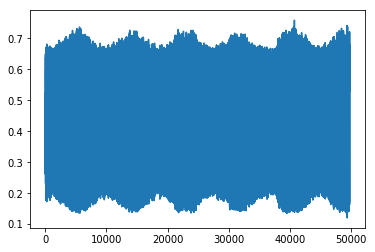

In [21]:
plt.plot(preds)


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


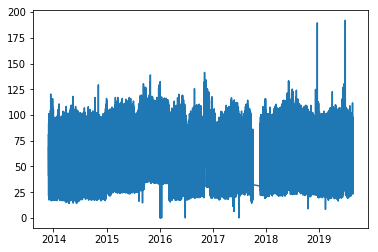

In [22]:
plt.plot(flow)

In [23]:
p = np.array(preds)
pp = np.vstack([p for i in range(24)])

In [24]:
ppp = pp.T

In [25]:
desc_preds = y_scaler.inverse_transform(ppp)

In [26]:
desc_preds = desc_preds[:, 0]

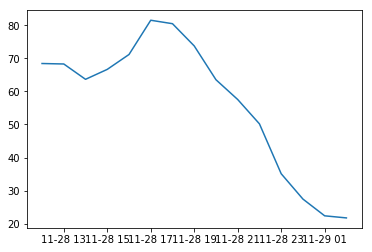

In [27]:
plt.plot(flow[0:25])

In [28]:
flow.values[0]

array([nan])

In [38]:
features = pd.concat([features, flow.resample('H').mean()], axis=1, join='inner')

In [42]:
leak = [features.flow.values[i] - desc_preds[i+1] for i in range(desc_preds.shape[0]-1)]

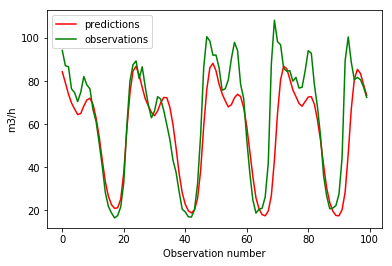

In [72]:
plt.plot(desc_preds[4401:4501], color='red', label='predictions')
plt.plot(flow.flow.values[4400:4500], color='green', label='observations')
plt.xlabel('Observation number')
plt.ylabel('m3/h')
plt.legend()

In [44]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


In [45]:
leak_rolling = moving_average(leak, n=24*7)

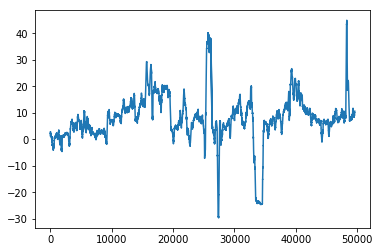

In [46]:
plt.plot(leak_rolling)

In [47]:
np.array(leak[10:]).mean()

8.004659205687222

In [48]:
np.array([3.51, 14.42, 9.35, 6.30, 9.29]).mean()

8.574

In [ ]:
fill_zeros = np.zeros(len(flow) - desc_preds.shape[0])

In [ ]:
desc_preds_full = np.hstack([fill_zeros, desc_preds])

In [ ]:
flow['preds'] = desc_preds_full

In [52]:
features['desc_preds'] = desc_preds

In [56]:
features['desc_preds_1'] = features['desc_preds'].shift(1)

In [58]:
features['error'] = features.flow - features.desc_preds_1

In [ ]:
flow_final['error'] = flow_final.flow - flow_final.preds

In [60]:
import datetime

In [61]:
print(
      "LEAK m3/h PER YEAR", '\n', 
      "2014: ", features.error[features.index.year == 2014].mean(), '\n',
      "2015: ", features.error[features.index.year == 2015].mean(), '\n',
      "2016: ", features.error[features.index.year == 2016].mean(), '\n',
      "2017: ", features.error[(features.index.year == 2017) & (features.index.month != 10) & (features.index.month != 11)].mean(), '\n',
      "2018: ", features.error[features.index.year == 2018].mean(), '\n',
      "2019-Q1: ", features.error[(features.index.date < datetime.date(2019, 4, 1)) & (features.index.date > datetime.date(2018, 12, 31))].mean(), '\n',
      "2019-Q2: ", features.error[(features.index.date > datetime.date(2019, 3, 31)) & (features.index.date < datetime.date(2019, 7, 31))].mean(), '\n',

     )

LEAK m3/h PER YEAR 
 2014:  2.9496540339548574 
 2015:  13.188093628369373 
 2016:  10.925995176143832 
 2017:  5.959177784568986 
 2018:  10.93439607075806 
 2019-Q1:  6.146352781643692 
 2019-Q2:  11.789347494474207 



In [65]:
print(
      "PERCENTAGE OFF PER YEAR", '\n', 
      "2014: ", features.error[features.index.year == 2014].mean()/3.51 - 1, '\n',
      "2015: ", features.error[features.index.year == 2015].mean()/14.42 - 1, '\n',
      "2016: ", features.error[features.index.year == 2016].mean()/9.35-1, '\n',
      "2017: ", features.error[(features.index.year == 2017) & (features.index.month != 10) & (features.index.month != 11)].mean()/6.3-1, '\n',
      "2018: ", features.error[features.index.year == 2018].mean()/9.29-1, '\n',
     )

PERCENTAGE OFF PER YEAR 
 2014:  -0.1596427253689865 
 2015:  -0.08543040025177717 
 2016:  0.16855563381217453 
 2017:  -0.05409876435412919 
 2018:  0.17700711202993125 



In [70]:
print(
      "ABSOLUTE M3/H OFF PER YEAR", '\n', 
      "2014: ", features.error[features.index.year == 2014].mean() - 3.51, '\n',
      "2015: ", features.error[features.index.year == 2015].mean() - 14.42, '\n',
      "2016: ", features.error[features.index.year == 2016].mean() -9.35, '\n',
      "2017: ", features.error[(features.index.year == 2017) & (features.index.month != 10) & (features.index.month != 11)].mean() - 6.3, '\n',
      "2018: ", features.error[features.index.year == 2018].mean() - 9.29, '\n',
     )

ABSOLUTE M3/H OFF PER YEAR 
 2014:  -0.5603459660451424 
 2015:  -1.231906371630627 
 2016:  1.5759951761438327 
 2017:  -0.34082221543101365 
 2018:  1.6443960707580612 

